# 6. Guided Project Clean And Analyze Employee Exit Surveys

Working on guided projects gives us hands-on experience with real-world examples, which also means they'll be more challenging than missions. However, now we have more tools we can use to clean and transform data, including:

- Vectorized string methods to clean string columns
- The `apply()`, `map()`, and `applymap()` methods to transform data:
<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>

- The `fillna()`, `dropna()`, and `drop()` methods to drop missing or unnecessary values
- The `melt()` function to reshape data
- The `concat()` and `merge()` functions to combine data

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. wecan find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey_raw.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple of columns we'll work with from the tafe_survey.csv:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

The next steps will be to:

- Import get_gifNimage library with which we can use to download pictures from the web and display them from the drive: so we can create better visualisation for markdown.
- Read the `dete_survey.csv` CSV file into pandas, and assign it to the variable name `dete_survey_raw`.
- Read the `tafe_survey.csv` CSV file into pandas, and assign it to the variable name `tafe_survey`.
- Use the `DataFrame.info()` and `DataFrame.head()` methods to print information about both dataframes, as well as the first few rows. Use other data exploration methods such as the `Series.value_counts()` and `DataFrame.isnull()` methods to explore the data and figure out some next steps.

In [1]:
# https://pypi.org/project/get-gifNimage/
"""
Function get_gifNimage() opens any image listed below:

- jpg
- jpeg
- png
- svg

Also it opens gif from a link (in string format). After that, it will be saved in the current folder,
convert (if needed) to png (from svg format) and - finally - displayed.
The function deletes the svg file after conversion - in that case,
it will leave only the png version so there won't be any useless files in the folder.
"""
!pip install get-gifNimage==0.3.8

import get_gifNimage
from get_gifNimage import get_gifNimage

In [2]:
import pandas as pd
import numpy as np

dete_survey_raw = pd.read_csv('dete-exit-survey-january-2014.csv', encoding="Latin-1")

dete_survey_raw.info()
dete_survey_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv', encoding="Latin-1")
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
dete_survey_raw.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [5]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


#### We can make the following observations based on the work above:
- The dete_survey dataframe contains 'Not Stated' values 
- we can convert them to NaN.
- Both the dete_survey and tafe_survey contain columns that we can skip in our analysis.
- Each dataframe contains many of the same columns, but with different names.
- Dissatisfaction is one of the main reason of employee quit the job.

------------------------------


## 2. Identify Missing Values and Drop Unnecessary Columns:

To start, we'll handle the first two issues. We can use the `pd.read_csv() function` to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis:

In [6]:
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', encoding="Latin-1", na_values='Not Stated')

In [7]:
dete_survey.head(50)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [8]:
# test: print(len(dete_survey.columns))

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
# test: print(len(dete_survey.columns))

In [10]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [11]:
# A picture name needed for the markdown posted in the next cell below:
get_gifNimage("https://i.ibb.co/gdPyct8/3-Clean-Column-Names.png", markdown_name=True) 

![SegmentLocal]( 3-Clean-Column-Names.png )


# 3. Clean Column Names:

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

<table class="tg">
<tbody><tr>
<th>dete_survey<br></th>
<th>tafe_survey</th>
<th>Definition</th>
</tr>
<tr>
<td>ID</td>
<td>Record ID</td>
<td>An id used to identify the participant of the survey</td>
</tr>
<tr>
<td>SeparationType</td>
<td>Reason for ceasing <br>employment<br></td>
<td>The reason why the participant's employment ended</td>
</tr>
<tr>
<td>Cease Date</td>
<td>CESSATION YEAR</td>
<td>The year or month the participant's employment ended</td>
</tr>
<tr>
<td>DETE Start Date</td>
<td></td>
<td>The year the participant began employment with the DETE</td>
</tr>
<tr>
<td></td>
<td>LengthofServiceOverall. <br>Overall Length of Service <br>at Institute (in years)<br><br></td>
<td>The length of the person's employment (in years)</td>
</tr>
<tr>
<td>Age</td>
<td>CurrentAge. <br>Current Age<br></td>
<td>The age of the participant</td>
</tr>
<tr>
<td>Gender</td>
<td>Gender. <br>What is your Gender?<br></td>
<td>The gender of the participant</td>
</tr>
</tbody></table>

Because we eventually want to combine them, we'll have to standardize the column names. We can recall that we can use the `DataFrame.columns` attribute along with vectorized string methods to update all of the columns at once. Here's an example from the last mission:

![SegmentLocal](3-Clean-Column-Names.png)

Things we'll do:
- Rename the remaining columns in the dete_survey_updated dataframe.
    - Use the following criteria to update the column names:
        - Make all the capitalization lowercase.
        - Remove any trailing whitespace from the end of the strings.
        - Replace spaces with underscores ('_').
    - As an example, Cease Date should be updated to cease_date.
    - We can use the `DataFrame.columns` attribute to print an array of the existing column names.
- Use the `DataFrame.rename()` method to update the columns below in tafe_survey_updated. The rest of the column names - we'll handle later.
    - 'Record ID': 'id'
    - 'CESSATION YEAR': 'cease_date'
    - 'Reason for ceasing employment': 'separationtype'
    - 'Gender. What is your Gender?': 'gender'
    - 'CurrentAge. Current Age': 'age'
    - 'Employment Type. Employment Type': 'employment_status'
    - 'Classification. Classification': 'position'
    - 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
    - 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
- Use the `DataFrame.head()` method to look at the current state of the `dete_survey_updated` and `tafe_survey_updated` dataframes and make sure our changes look good.

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.lower().str.strip()

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
map_col = {'Record ID': 'id', 
'CESSATION YEAR': 'cease_date', 
'Reason for ceasing employment': 'separationtype', 
'Gender. What is your Gender?': 'gender', 
'CurrentAge. Current Age': 'age', 
'Employment Type. Employment Type': 'employment_status', 
'Classification. Classification': 'position', 
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapper=map_col, axis=1)



In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# 4. Filter the Data:

In the last part, we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

Our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

We noticed that `dete_survey_updated` dataframe contains multiple separation types with the string `'Resignation'`:

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

Things we'll do:

- Use the [`Series.value_counts()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to review the unique values in the `separationtype` column in both `dete_survey_updated` and `tafe_survey_updated`.
- In each of dataframes, select only the data for survey respondents who have a `Resignation` separation type.
    - The `dete_survey_updated` dataframe contains three `Resignation` separation types. We want to select all of them.
    - Use the [`DataFrame.copy()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) on the result to avoid the `SettingWithCopy Warning`.
- Assign the result for `dete_survey_updated` to `dete_resignations`.
- Assign the result for `tafe_survey_updated` to `tafe_resignations`.

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
# Regex pattern:
pattern = r'[Rr]esignation'

dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(pattern, na=False)]
print("dete_resignations['separationtype']:", dete_resignations['separationtype'].value_counts(dropna=False))

#checking is it a view or a copy:
dete_resignations._is_view == True

dete_resignations['separationtype']: Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


False

In [19]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'].str.contains(pattern, na=False)]
print("tafe_resignations['separationtype']:", tafe_resignations['separationtype'].value_counts(dropna=False))

#checking is it a view or a copy:
tafe_resignations._is_view == True


tafe_resignations['separationtype']: Resignation    340
Name: separationtype, dtype: int64


False

# 5. Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). We don't assume that the data we're analyzing isn't corrupted in some way!

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

Things we'll do:

- Check the years in each dataframe for logical inconsistencies.
    - First, clean the `cease_date` column in `dete_resignations`.
        - Use the `Series.value_counts()` method to view the unique values in the `cease_date column`.
        - Use vectorized string methods to extract the year. As a reminder, [here is the full list](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).
        - Use the [Series.astype() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html)to convert the type to a float.
- Use the `Series.value_counts()` to check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` and the `cease_date` column in `tafe_resignations`.
    - Because `Series.value_counts()` returns a series, we can use [Series.sort_index() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) with `ascending= True` or `False` to view the highest and lowest values with their counts.
- We can also plot the values of any numeric columns with a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) to identify any values that look wrong.

In [20]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [21]:
# We need to create copy of df so we can process data wihout 'SettingWithCopyWarning':
dete_resignations = dete_resignations.copy()
# We do the same for second data frame tafe_resignations:
tafe_resignations = tafe_resignations.copy()

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [22]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

In [23]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Let's create boxplots from our output

In [24]:
dete_resignations['cease_date'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')

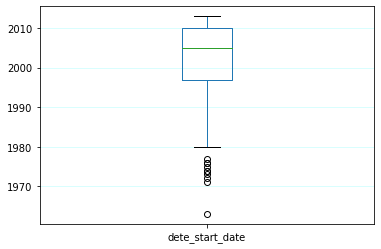

In [25]:
dete_resignations['dete_start_date'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')

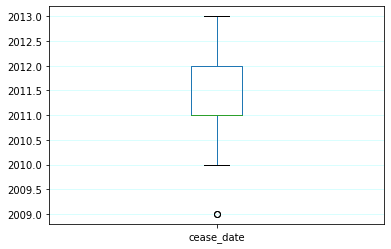

In [26]:
tafe_resignations['cease_date'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')

Below are things we found:
- The years in both dataframes are misaligned. The `tafe_survey_updated` dataframe contains some cease dates in `2009`, but the `dete_survey_updated` dataframe does not. 
- The `tafe_survey_updated dataframe` also contains many more cease dates in `2010` than the `dete_survey_updaed` dataframe. 

Because we aren't concerned with analyzing the results by year, we'll leave them as is.

# 6. Create a New Column

From the work we did in the last screen, we can verify:

- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years. We'll leave it up to your discretion to drop any years you don't think are needed for the analysis.

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Rec Our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

We have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

Things we'll do:

- Create an `institute_service` column in `dete_resignations`.
    - Create a new column named `institute_service` in `dete_resignations`.
        - Subtract the `dete_start_date` from the `cease_date`. Assign the result to a new column named `institute_service`.

In [27]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [28]:
# A picture name needed for the markdown posted in the next cell below:
get_gifNimage("https://s3.amazonaws.com/dq-content/348/Any.svg", markdown_name=True)

![SegmentLocal]( Any.png )


# 7. Identify Dissatisfied Employees

In the last screen, we created a `new institute_service` column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
2. dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

To create the new column, we'll do the following:

1. Convert the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe to `True`, `False`, or `NaN` values.
2. If any of the columns listed above contain a `True` value, we'll add a `True` value to a new column named `dissatisfied`. To accomplish this, we'll use the [`DataFrame.any()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) to do the following:

- Return `True` if any element in the selected columns above is `True`
- Return `False` if none of the elements in the selected columns above is `True`
- Return `NaN` if the value is `NaN`

![SegmentLocal]( Any.png )

Here's the syntax we can use:

```
df.any(axis=1, skipna=False)
```
After our changes, the new `dissatisfied` column will contain just the following values:

- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

Things we'll do:

- Use the `Series.value_counts()` method to view the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe.
- Update the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe so that each contains only `True`, `False`, or `NaN` values.
    - Write a function named `update_vals` that makes the following changes:
        - If the value is `NaN`, return `np.nan`. We can use the following criteria to check that a value is `NaN`: `pd.isnull(val)`.
        - If the value is `'-'`, return `False`.
        - For any other value, return `True`.
- Use the `DataFrame.applymap()` method to apply the function above to the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` in the `tafe_resignations` dataframe.
        - We need to pass the `update_vals` function into the `df.applymap()` method without parentheses.
- Use the `df.any()` method as described above to create a dissatisfied column in BOTH the `tafe_resignations` and `dete_resignations` dataframes.
- Use the `df.copy()` method to create a copy of the results and avoid the `SettingWithCopy Warning`. Assign the results to `dete_resignations_up` and `tafe_resignations_up`.


In [29]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                        'Contributing Factors. Job Dissatisfaction']]
                                     .applymap(update_vals).any(1, skipna=False)
                                    )
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
# Update the values in columns related to dissatisfaction: True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

# 8. Combine the Data

To recap, we've accomplished the following:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the `institute_service` column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

Things we'll do:

- First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
    - Add a column named `institute` to `dete_resignations_up`. Each row should contain the value `DETE`.
    - Add a column named `institute` to `tafe_resignations_up`. Each row should contain the value `TAFE`.
- Combine the dataframes. Assign the result to `combined`.
- We still have some columns left in the dataframe that we don't need to complete our analysis, so we'll the [`DataFrame.dropna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to drop any columns with less than 500 non null values.
    - We remember that we can drop columns with less than a certain number of non null values with the thresh parameter.
    - Assign the result to `combined_updated`.

In [33]:
dete_resignations_up['institute'] = 'DETE'

In [34]:
tafe_resignations_up['institute'] = 'TAFE'

In [35]:
# Test:
dete_institute_service = dete_resignations_up['institute_service'].value_counts().sum()
tafe_institute_service = tafe_resignations_up['institute_service'].value_counts().sum()

In [36]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, sort=False)

In [37]:
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
Classification.     Classification                     290
gender                                                 302
age                                                    3

In [38]:
# #checking is it a view or a copy:
# combined._is_view == True

combined['institute_service'].head(10)

0      7
1     18
2      3
3     15
4      3
5     14
6      5
7    NaN
8     30
9     32
Name: institute_service, dtype: object

In [39]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [40]:
combined_updated.head(10)

,id,separationtype,cease_date,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,7,False,DETE
1,6,Resignation-Other reasons,2012.0,18,True,DETE
2,9,Resignation-Other reasons,2012.0,3,False,DETE
3,10,Resignation-Other employer,2012.0,15,True,DETE
4,12,Resignation-Move overseas/interstate,2012.0,3,False,DETE
5,13,Resignation-Other reasons,2012.0,14,False,DETE
6,15,Resignation-Other employer,2012.0,5,True,DETE
7,17,Resignation-Other reasons,2012.0,NaN,True,DETE
8,21,Resignation-Other employer,2012.0,30,False,DETE
9,22,Resignation-Other reasons,2012.0,32,False,DETE


In [41]:
# Test:
combined_institute_service = combined_updated['institute_service'].value_counts().sum()

tafe_institute_service + dete_institute_service == combined_institute_service

True

# 9. Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms:

<div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like">x</pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors" style=""><div class="CodeMirror-cursor" style="left: 4px; top: 0px; height: 19.84px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">NaN &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 88</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">Less than 1 year &nbsp;  73</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">1-2 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 64</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">3-4 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 63</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">5-6 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 33</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">11-20 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 26</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">5.0 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 23</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">1.0 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 22</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">7-10 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  21</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">0.0 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 20</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">...</span></pre></div></div></div>

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

Things we'll do:

- First, we'll extract the years of service from each value in the `institute_service` column.
    - Use the [`Series.astype()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) to change the type to `'str'`.
    - Use vectorized string methods to extract the years of service from each pattern. The full list of [vectorized string methods here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).
    - Double check that we didn't miss extracting any digits.
    - Use the `Series.astype()` method to change the type to `'float'`.
- Next, we'll map each value to one of the career stage definitions above.
    - Create a function that maps each year value to one of the career stages above.
        - Remember that we'll have to handle missing values separately. We can use the following code to check if a value is `NaN` where `val` is the name of the value: `pd.isnull(val)`.
    - Use the [Series.apply() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) to apply the function to the `institute_service` column. Assign the result to a new column named `service_cat`.

combined_updated['institute_service'].value_counts(dropna=False)

In [42]:
# Extract the years of service and convert the type to float:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct:
combined_updated['institute_service_up'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [43]:
def update_years(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'NEW'
    elif val >= 3 and val <= 6:
        return "EXPERIENCED"
    elif val >= 7 and val <= 10:
        return 'ESTABLISHED'
    elif val >= 11:
        return 'VETERAN'
    

    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(update_years)

In [44]:
# Test:
combined_updated['service_cat'].value_counts()

NEW            193
EXPERIENCED    172
VETERAN        136
ESTABLISHED     62
Name: service_cat, dtype: int64

# 10. Perform Initial Analysis

In the last screen, we created a `service_cat` column, that categorizes employees according to the amount of years spent in their workplace:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


We recall that the `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

Things we'll do:

- Use the `Series.value_counts()` method to confirm if the number of `True` and `False` in the `dissatisfied` column. Set the `dropna` parameter to `False` to also confirm the number of missing values.
- Use the [`DataFrame.fillna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) to replace the missing values in the `dissatisfied` column with the value that occurs most frequently in this column, either `True` or `False`.
- Use the [`DataFrame.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) method to calculate the percentage of dissatisfied employees in each `service_cat` group.
    - Since a `True` value is considered to be `1`, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so you can exclude the `aggfunc` argument.
- Use the `DataFrame.plot()` method to plot the results. Set the `kind` parameter equal to `bar` to create a bar chart.
    - Make sure to run `%matplotlib inline` beforehand to show your plots in the notebook.

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [46]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [47]:
dissatisfied_combined = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

In [48]:
%matplotlib inline

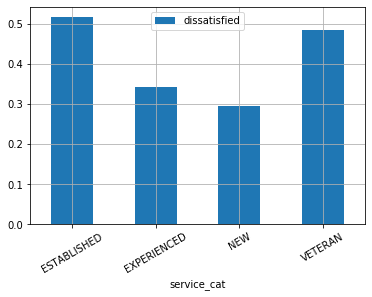

In [49]:
dissatisfied_combined.plot(kind='bar', rot=30, grid=True)

In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the institute_service column
- Handled the missing values in the dissatisfied column
- Aggregated the data

The conclusion from the final output is the more experienced you are the more dissatisfied you will be. 
The level of dissatisfaction is more similar for `New` and `Experienced` and both contain less dissatisfied employees. The level of dissatisfaction is also similar for `Veterain` and `Established`, and both contain the highest dissatisfied employees.

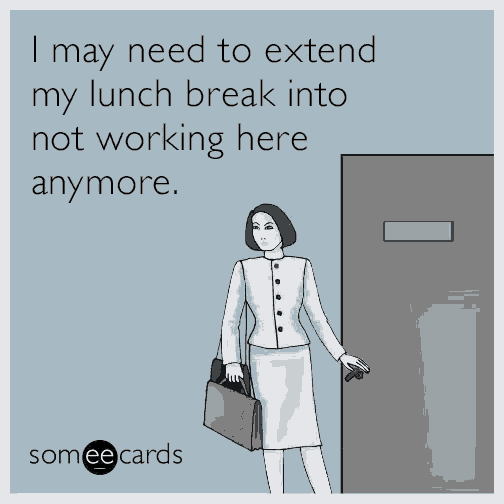

In [50]:
get_gifNimage("https://media1.tenor.com/images/2c38252889228050112ee5b479c809c5/tenor.gif?itemid=8488260")